In [3]:
from __future__ import print_function
from distutils.version import LooseVersion as Version
import sys

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.7 is required,"
                " but %s is installed." % sys.version)
def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == min_ver:
            print(OK, "%s version %s is installed."
                % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                % (lib, min_ver, ver))
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod

# first check the python version
pyversion = Version(sys.version)
if pyversion >= "3.7":
    print(OK, "Python version is %s" % sys.version)
elif pyversion < "3.7":
    print(FAIL, "Python version 3.7 is required,"
                " but %s is installed." % sys.version)
else:
    print(FAIL, "Unknown Python version: %s" % sys.version)

    
print()
requirements = {'numpy': "1.18.5", 'matplotlib': "3.2.2",'sklearn': "0.23.1",
                'pandas': "1.0.5",'xgboost': "1.1.1", 'shap': "0.35.0"}
# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.7.4 (v3.7.4:e09359112e, Jul  8 2019, 14:54:52) 
[Clang 6.0 (clang-600.0.57)]

[ OK ] numpy version 1.18.5 is installed.
[ OK ] matplotlib version 3.2.2 is installed.
[ OK ] sklearn version 0.23.1 is installed.
[ OK ] pandas version 1.0.5 is installed.
[ OK ] xgboost version 1.1.1 is installed.
[ OK ] shap version 0.35.0 is installed.


count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64


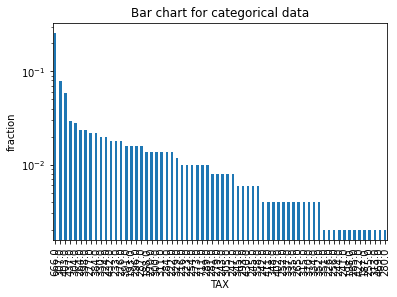

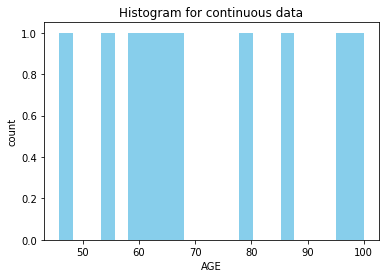

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [109]:
# visualizing the data - single column

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)

# describe the data to determine which kind of chart to make
#should always print to learn more about a specific column in dataset
#age is continuous
print(df['AGE'].describe())

#bar chart, used for categorical data only
pd.value_counts(df['TAX'],normalize=True).plot.bar() #can either do by count or normalize (fraction)
plt.title('Bar chart for categorical data')
plt.semilogy()
plt.ylabel('fraction')
plt.xlabel('TAX')
plt.show()

#histogram, used for continuous data only
#by default a histogram will display 10 bins - ideal num of bins is sqrt of points
smalldf = df[:10]
smalldf['AGE'].plot.hist(bins = int(np.sqrt(df.shape[0])), color="skyblue") #this is changing the # of bins
plt.title('Histogram for continuous data')
plt.xlabel('AGE')
plt.ylabel('count')
plt.show()


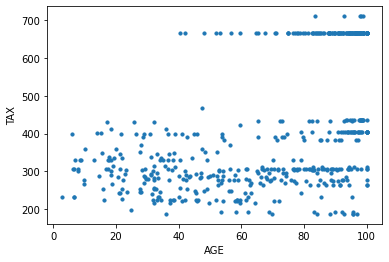

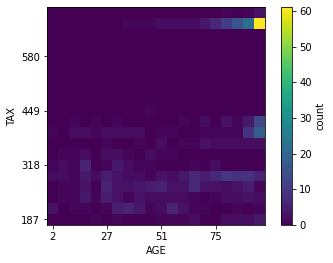

In [117]:
# visualizing the data - multiple columns
#options for two continuous features: scatter plot and heatmap


#scatter plot

# alpha= between 0 and 1, opacity of the points
df.plot.scatter('AGE','TAX',s=10,alpha=1)
plt.show()


# heat map

heatmap,xedges,yedges = np.histogram2d(df['AGE'],df['TAX'],bins=nbins)
extent = [xedges[0],xedges[-1], yedges[0], yedges[-1]]

nbins = 20

plt.imshow(heatmap.T, origin='lower') #use log count
plt.xlabel('AGE')
plt.ylabel('TAX')
plt.colorbar(label='count')
plt.xticks(np.arange(nbins)[::int(nbins/4)],xedges[::int(nbins/4)].astype(int))
plt.yticks(np.arange(nbins)[::int(nbins/4)],yedges[::int(nbins/4)].astype(int))
plt.show()


TAX       222.0  242.0  296.0  311.0
AgeGroup                            
False       2.0    2.0    1.0    4.0
True        1.0    NaN    NaN    NaN


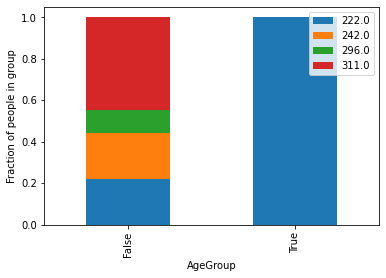

In [125]:
# visualize age of people by what sex they are

# Going to narrow down age by grouping greater/less than 50.
df.loc[df['AGE'] <= 50, 'AgeGroup'] = 'True' 
df.loc[df['AGE'] > 50, 'AgeGroup'] = 'False'

littledf = df[:10] # I'm only going to look at first 10 lines to keep it simple for now



count_matrix = littledf.groupby(['AgeGroup','TAX']).size().unstack()
print(count_matrix)

# see the fractions/percentage of people
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
# print(count_matrix_norm)


#visualize fractions
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of people in group')
plt.legend(loc=1)
plt.show()

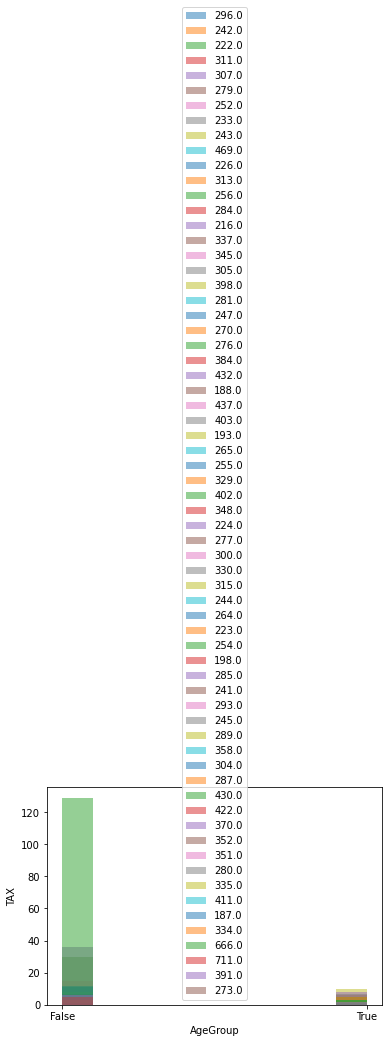

In [126]:

categories = df['TAX'].unique()
bin_range = (df['AgeGroup'].min(), df['AgeGroup'].max())

for c in categories:
    plt.hist(df[df['TAX']==c]['AgeGroup'],alpha=0.5, label=c,range=bin_range, bins=10)
    
plt.legend()
plt.ylabel('TAX')
plt.xlabel('AgeGroup')
plt.show()

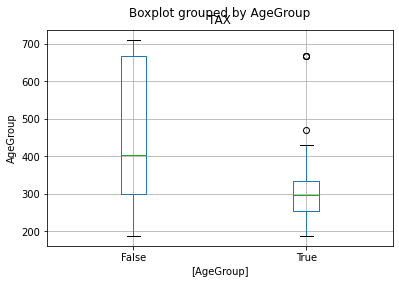

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT equal_or_lower_than_50? Age-Group AgeGroup  
0       15.3  396.90   4.9

In [134]:
df[['AgeGroup','TAX']].boxplot(by='AgeGroup')
plt.ylabel('AgeGroup')
plt.show()

print(df)

ValueError: zero-size array to reduction operation minimum which has no identity

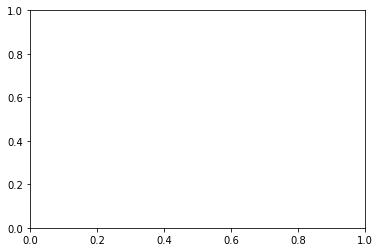

In [138]:
#violin plot
# print(df['RAD'])
dataset = [df[df['RAD']=='<=3']['TAX'].values,
           df[df['RAD']==' >3']['TAX'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['<=240', '>240'])
plt.label('RAD')
plt.show()